# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [119]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [120]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [121]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [122]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en")
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 9341


In [123]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

Total articles about Ethereum: 1831


In [124]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,Elon Musks cryptocurrency hype was more than j...,2021-02-08,0.3182,0.091,0.000,0.909
1,"Tesla, led by Elon Musk, confirmed that it pur...",2021-02-09,0.3818,0.071,0.000,0.929
2,"For a brief moment on Sunday, before Tesla sai...",2021-02-09,-0.1027,0.000,0.038,0.962
3,Twitter and Square CEO Jack Dorsey and rapper ...,2021-02-12,0.2500,0.056,0.000,0.944
4,"Today in an SEC filing, Tesla disclosed that i...",2021-02-08,0.6597,0.137,0.000,0.863


In [125]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,text,date,compound,positive,negative,neutral
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.119,0.818
1,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,0.0000,0.000,0.000,1.000
2,By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03,0.0000,0.000,0.000,1.000
3,NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,0.4404,0.091,0.000,0.909
4,While the first Christie's auction of digital ...,2021-02-20,0.0258,0.030,0.000,0.970


In [126]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.282756,0.077333,0.012722,0.909889
std,0.332195,0.064251,0.026797,0.059923
min,-0.381800,0.000000,0.000000,0.754000
25%,0.025675,0.042750,0.000000,0.869000
50%,0.284100,0.068500,0.000000,0.914000
75%,0.559650,0.110000,0.000000,0.952250
max,0.831600,0.246000,0.082000,1.000000


In [127]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.221340,0.056950,0.005950,0.937100
std,0.287580,0.055042,0.026609,0.061753
min,-0.340000,0.000000,0.000000,0.818000
25%,0.000000,0.000000,0.000000,0.883500
50%,0.172000,0.067000,0.000000,0.929000
75%,0.453775,0.096500,0.000000,1.000000
max,0.709600,0.144000,0.119000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin (0.077333)

Q: Which coin had the highest compound score?

A: Bitcoin (0.831600)

Q. Which coin had the highest positive score?

A: Bitcoin (0.246000)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [128]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [129]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'also'}

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [130]:
# Complete the tokenizer function
def tokenizer(text):

    """Tokenizes text."""
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")

    # Remove the punctuation from text
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)  
   
    # Create a tokenized list of the words
    sw = set(stopwords.words('english'))   
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
   
    return output

In [131]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Elon Musks cryptocurrency hype was more than j...,2021-02-08,0.3182,0.091,0.000,0.909,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,"Tesla, led by Elon Musk, confirmed that it pur...",2021-02-09,0.3818,0.071,0.000,0.929,"[tesla, led, elon, musk, confirmed, purchased,..."
2,"For a brief moment on Sunday, before Tesla sai...",2021-02-09,-0.1027,0.000,0.038,0.962,"[brief, moment, sunday, tesla, said, invested,..."
3,Twitter and Square CEO Jack Dorsey and rapper ...,2021-02-12,0.2500,0.056,0.000,0.944,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,"Today in an SEC filing, Tesla disclosed that i...",2021-02-08,0.6597,0.137,0.000,0.863,"[today, sec, filing, tesla, disclosed, ha, acq..."


In [132]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,0.0000,0.000,0.000,1.000,"[file, photo, representation, ethereum, virtua..."
2,By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representation, et..."
3,NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,0.4404,0.091,0.000,0.909,"[nfts, nonfungible, token, scarce, digital, co..."
4,While the first Christie's auction of digital ...,2021-02-20,0.0258,0.030,0.000,0.970,"[first, christies, auction, digital, artwork, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [133]:
from collections import Counter
from nltk import ngrams

In [134]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)

# get word counts
bitcoin_counts = Counter(ngrams(bitcoin_processed, n=2))

# get top x words
print(dict(bitcoin_counts.most_common(10)))

{('billion', 'bitcoin'): 3, ('elon', 'musks'): 2, ('jack', 'dorsey'): 2, ('jay', 'z'): 2, ('popular', 'cryptocurrency'): 2, ('bitcoin', 'future'): 2, ('char', 'bitcoin'): 2, ('cryptocurrency', 'exchange'): 2, ('alltime', 'high'): 2, ('daily', 'crunch'): 2}


In [135]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text)

# get word counts
ethereum_counts = Counter(ngrams(ethereum_processed, n=2))

# get top x words
print(dict(ethereum_counts.most_common(10)))

{('record', 'high'): 6, ('char', 'reuters'): 4, ('feb', 'reuters'): 4, ('char', 'new'): 4, ('new', 'york'): 4, ('photo', 'representation'): 3, ('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 3, ('currency', 'standing'): 3}


In [136]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [137]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_words = token_count(bitcoin_processed)
bitcoin_top_words

[('char', 18), ('bitcoin', 13), ('cryptocurrency', 8)]

In [138]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_words = token_count(ethereum_processed)
ethereum_top_words

[('char', 20), ('ethereum', 14), ('reuters', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

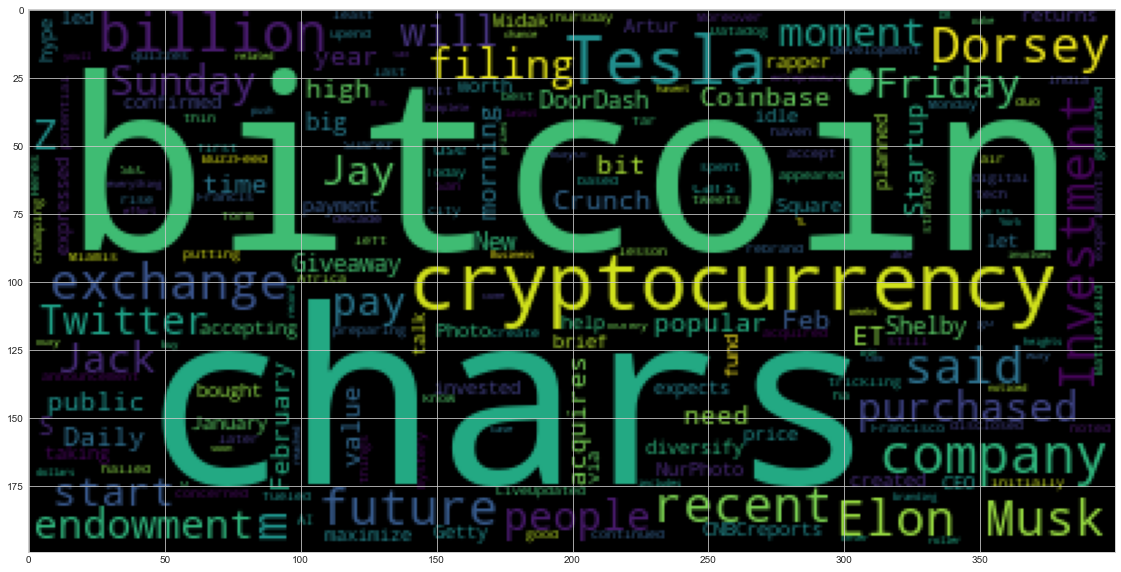

In [140]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

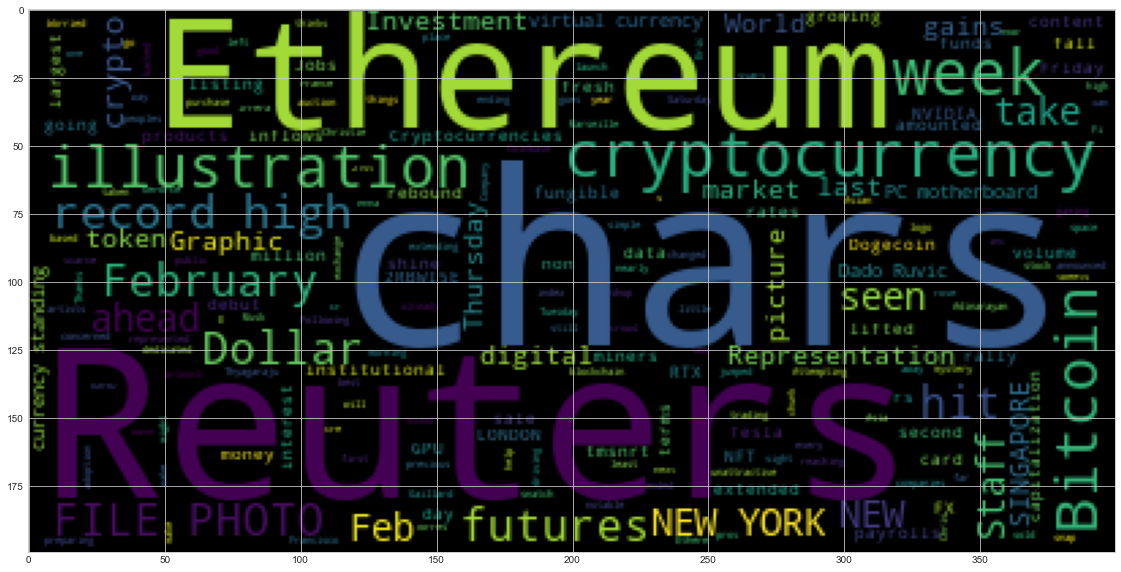

In [141]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [142]:
import spacy
from spacy import displacy

In [143]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [144]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [145]:
# Concatenate all of the Bitcoin text together
bitcoin_joined_text = ' '.join(bitcoin_df.text)
bitcoin_joined_text

"Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars] Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars] For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars] Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars] Today in an SEC filing, Tesla disclosed that it has acquired $1.5 billion in bitcoin, the popular cryptocurrency. Moreover, the compan

In [146]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin Named Entity Recognition"

In [147]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [148]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
first ORDINAL
more than a decade later DATE
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
Jack Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Francis Suarez PERSON
Bitcoins PERSON
recent weeks DATE
Friday DATE
over $12,000 MONEY
New York GPE
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
6 CARDINAL
Alabamas PERSON
Richard Shelby PERSON
next year DATE
Shelby PERSON
86 DATE
seventh ORDINAL
Blockchain.com ORG
$120 m

---

### Ethereum NER

In [149]:
# Concatenate all of the Ethereum text together
ethereum_joined_text = ' '.join(ethereum_df.text)
ethereum_joined_text

"Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - E… [+472 chars] By Reuters Staff\r\nFILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most not

In [150]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [151]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [152]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
Friday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 M

---